# 16 варыянт

### Геаметрычнае – G(p), p = 0.5; 

### Бінаміяльнае – Bi(m,p), m = 6, p = 0.3333333.

In [1]:
import numpy as np
from numpy import random, vectorize
from matplotlib import pylab as plt
from scipy import special, stats
import math

In [2]:
def binomial(m: int, p: float, n: int):
    for i in range(n):
        s = 0
        for j in range(m):
            r = random.random()
            s += int(r <= p)
        yield s

def geometric(p: float, n: int):
    for i in range(n):
        result = 0
        while random.random() > p:
            result += 1
        yield result
        
def geometric2(p, n):
    for i in range(n):
        a = random.random()
        x = abs(math.ceil(math.log2(a) / math.log2(1 - p)))
        yield x - 1
        
def skewness(data):
    return np.sum((data - np.mean(data)) ** 3) / len(data) / (np.std(data) ** 3)

def kurtosis(data):
    return np.sum((data - np.mean(data)) ** 4) / len(data) / (np.std(data) ** 4) - 3
        
@vectorize
def geom_th(x, p=0.5):
    return p * (1-p) ** x

def geom_th_cum(x, p=0.5):
    return np.cumsum(geom_th(x, p))

@vectorize
def bin_th(x, p=0.5, m=6):
    return special.binom(m, x) * p ** x * (1 - p) ** (m - x)

def bin_th_cum(x, p=0.5, m=6):
    return np.cumsum(bin_th(x, p, m))

def prob_hist(data, theor, x, title=''):
    m = np.max(data)
    plt.hist(data, density=True, bins=np.arange(m))
    plt.bar(x, theor(x), color='y', width=0.5)
    plt.title(title)
    plt.show()
    
def prob_f_hist(data, theor, title=''):
    s, bins = np.histogram(data, bins=np.arange(0, np.max(data)), density=True)
    cumsum = np.cumsum(s)
    bins = bins[:-1]
    plt.bar(bins + 0.5, cumsum, width=0.8)
    plt.bar(bins + 0.5, theor(bins), color='y', width=0.4)
    plt.title(title)
    plt.show()

In [3]:
p_g = 0.5
p_b = 1 / 3
m = 6
n = 10 ** 3

def geom_th_current(x):
    return geom_th(x - 0.5, p_g)

def bin_th_current(x):
    return bin_th(x - 0.5, p_b, m)

def geom_th_cum_current(x):
    return geom_th_cum(x, p_g)

def bin_th_cum_current(x):
    return bin_th_cum(x, p_b, m)

In [4]:
geom = np.fromiter((v for v in geometric(p_g, n)), np.int)

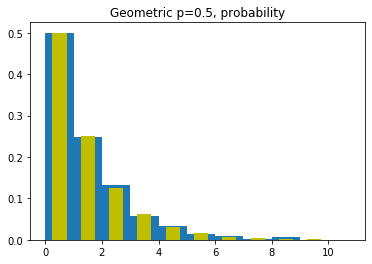

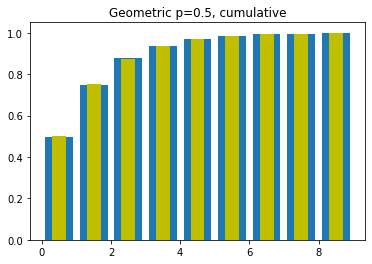

Theoretical mean: 1.0
Experimantal mean: 1.012
Theoretical dispersion: 2.0
Experimantal dispersion: 2.0618559999999997
Theoretical skewness: 2.1213203435596424
Experimantal skewness: 2.123103127879846
Theoretical kurtosis: 6.5
Experimantal kurtosis: 5.989003240218652


In [5]:
prob_hist(geom, geom_th_current, np.arange(0, np.max(geom) + 1) + 0.5, title=f'Geometric p={p_g}, probability')
prob_f_hist(geom, geom_th_cum_current, title=f'Geometric p={p_g}, cumulative')
print(f'Theoretical mean: {(1-p_g)/p_g}')
print(f'Experimantal mean: {np.mean(geom)}')
print(f'Theoretical dispersion: {(1-p_g)/(p_g**2)}')
print(f'Experimantal dispersion: {np.std(geom)**2}')
print(f'Theoretical skewness: {(2-p_g)/(1-p_g)**0.5}')
print(f'Experimantal skewness: {skewness(geom)}')
print(f'Theoretical kurtosis: {6+p_g**2/(1-p_g)}')
print(f'Experimantal kurtosis: {kurtosis(geom)}')

In [6]:
geom2 = np.fromiter((v for v in geometric2(p_g, n)), np.int)

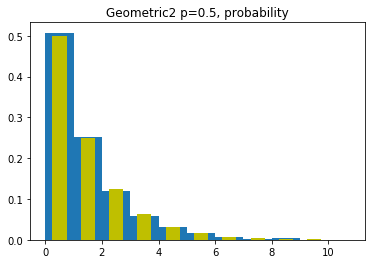

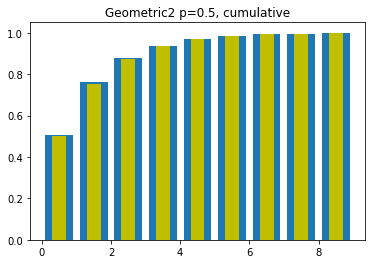

Theoretical mean: 1.0
Experimantal mean: 0.983
Theoretical dispersion: 2.0
Experimantal dispersion: 2.0147110000000006
Theoretical skewness: 2.1213203435596424
Experimantal skewness: 2.1973544592276526
Theoretical kurtosis: 6.5
Experimantal kurtosis: 6.662039428828541


In [7]:
prob_hist(geom2, geom_th_current, np.arange(0, np.max(geom2) + 1) + 0.5, title=f'Geometric2 p={p_g}, probability')
prob_f_hist(geom2, geom_th_cum_current, title=f'Geometric2 p={p_g}, cumulative')
print(f'Theoretical mean: {(1-p_g)/p_g}')
print(f'Experimantal mean: {np.mean(geom2)}')
print(f'Theoretical dispersion: {(1-p_g)/(p_g**2)}')
print(f'Experimantal dispersion: {np.std(geom2)**2}')
print(f'Theoretical skewness: {(2-p_g)/(1-p_g)**0.5}')
print(f'Experimantal skewness: {skewness(geom2)}')
print(f'Theoretical kurtosis: {6+p_g**2/(1-p_g)}')
print(f'Experimantal kurtosis: {kurtosis(geom2)}')

In [8]:
binom = np.fromiter((v for v in binomial(m, p_b, n)), np.int)

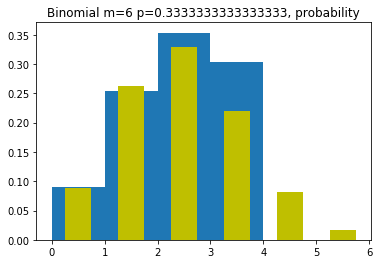

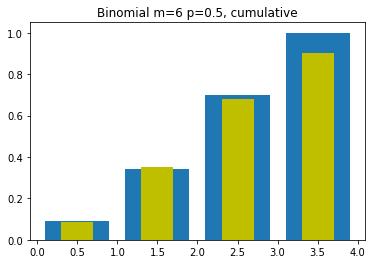

Theoretical mean: 2.0
Experimantal mean: 1.981
Theoretical dispersion: 1.3333333333333335
Experimantal dispersion: 1.236639
Theoretical skewness: 0.2886751345948129
Experimantal skewness: 0.17269930043889573
Theoretical kurtosis: -0.25000000000000006
Experimantal kurtosis: -0.3841406598000896


In [9]:
prob_hist(binom, bin_th_current, np.arange(0, np.max(binom) + 1) + 0.5, title=f'Binomial m={m} p={p_b}, probability')
prob_f_hist(binom, bin_th_cum_current, title=f'Binomial m={m} p={p_g}, cumulative')
print(f'Theoretical mean: {p_b*m}')
print(f'Experimantal mean: {np.mean(binom)}')
print(f'Theoretical dispersion: {p_b*(1-p_b)*m}')
print(f'Experimantal dispersion: {np.std(binom)**2}')
print(f'Theoretical skewness: {(1-2*p_b)/(m*(1-p_b)*p_b)**0.5}')
print(f'Experimantal skewness: {skewness(binom)}')
print(f'Theoretical kurtosis: {(1-6*p_b*(1-p_b))/m/p_b/(1-p_b)}')
print(f'Experimantal kurtosis: {kurtosis(binom)}')